# 01_proximeta_summary

In [3]:
# Load packages
import pandas as pd
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

# file paths
path = '/Users/melissaherring/Google Drive/My Drive/MH_project/'
#path = '/Users/juliabrown/Google Drive/My Drive/projects/OMZvir_round2/MH_project/'

# load proximeta master table
proximeta = pd.read_csv(op.join(path, 'tables/proximeta_master.csv'))

## Virus type breakdown:

In [4]:
proximeta.groupby('virus_type').size().reset_index(name='count')

,virus_type,count
0,contig,295
1,unassociated vmag,195
2,uninfected mag,535
3,vmag,41


In this dataset, there are 295 viral contigs and 41 vmags that are associated with hosts. There are 195 vmags that are not associated with hosts. Lastly, there are 535 mags that are not associated with viruses.

In [9]:
proximeta[proximeta['virus_type'] == 'unassociated vmag']

,virus_name,virus_length,virus_read_count,virus_read_depth,virus_read_depth_in_host,host_name,host_length,host_read_count,host_read_depth,intra_read_count,...,host_genes,checkv_quality,miuvig_quality,completeness,completeness_method,contamination,kmer_freq,warnings_y,N,L
871,vMAG_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,Medium-quality,Genome-fragment,66.90,AAI-based (medium-confidence),0.0,1.00,NaN,2.0,36972.0
872,vMAG_12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,Medium-quality,Genome-fragment,70.44,AAI-based (medium-confidence),0.0,1.00,NaN,2.0,30847.0
873,vMAG_36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,Low-quality,Genome-fragment,3.68,AAI-based (medium-confidence),0.0,1.03,NaN,2.0,13927.0
874,vMAG_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,Medium-quality,Genome-fragment,54.88,AAI-based (medium-confidence),0.0,1.00,NaN,2.0,30359.0
875,vMAG_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,Medium-quality,Genome-fragment,80.00,AAI-based (medium-confidence),0.0,1.00,NaN,3.0,33140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,vMAG_35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,Low-quality,Genome-fragment,28.14,AAI-based (medium-confidence),0.0,1.00,NaN,2.0,15980.0
1062,vMAG_45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,Low-quality,Genome-fragment,36.45,AAI-based (medium-confidence),0.0,1.00,NaN,2.0,14520.0
1063,vMAG_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,Medium-quality,Genome-fragment,57.21,AAI-based (high-confidence),0.0,1.00,NaN,2.0,33980.0
1064,vMAG_27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,Medium-quality,Genome-fragment,75.07,AAI-based (medium-confidence),0.0,1.00,NaN,2.0,33970.0


In [7]:
virus_count = pd.DataFrame(proximeta.groupby(['sample_depth','virus_type']).size().reset_index(name='count'))
virus_count

,sample_depth,virus_type,count
0,80.0,contig,81
1,80.0,uninfected mag,129
2,80.0,vmag,15
3,95.0,contig,77
4,95.0,uninfected mag,143
5,95.0,vmag,10
6,140.0,contig,47
7,140.0,uninfected mag,111
8,140.0,vmag,9
9,400.0,contig,90


Text(0, 0.5, 'Count')

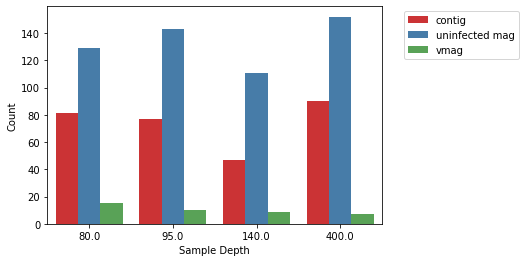

In [6]:
sns.barplot(x='sample_depth', y='count', hue='virus_type', data=virus_count, palette='Set1')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Sample Depth')
plt.ylabel('Count')

## Evaluating the Strength of Host-Virus Associations

### Plots: Distribution of adjusted_inter_vs_intra_ratio 

In [ ]:
# each data frame is created by grouping vmag_assoc by sample_name and virus_type and getting the group corresponding to that data frame

jv119_contig = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV119', 'contig'))
jv119_vMAG = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV119', 'vmag'))
jv119_uninfect = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV119', 'uninfected mag'))


jv121_contig = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV121', 'contig'))
jv121_vMAG = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV121', 'vmag'))

jv132_contig = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV132', 'contig'))
jv132_vMAG = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV132', 'vmag'))

jv154_contig = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV154', 'contig'))
jv154_vMAG = proximeta.groupby(['sample_name', 'virus_type'], as_index=False).get_group(('JV154', 'vmag'))

In [ ]:
# plot contigs

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

palette = sns.color_palette('gist_earth')

sns.histplot(jv119_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0,0], bins=10, color=palette[0], edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 Contigs (Sample Depth 400 Meters)')
axes[0,0].set_yscale('log')

sns.histplot(jv154_contig['adjusted_inter_vs_intra_ratio'],ax= axes[1,1], bins=10, color=palette[3], edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV154 Contigs (Sample Depth 140 Meters)')
axes[0,1].set_yscale('log')

sns.histplot(jv121_contig['adjusted_inter_vs_intra_ratio'],ax= axes[0,1], bins=10, color=palette[1], edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV121 Contigs (Sample Depth 95 Meters)')
axes[1,0].set_yscale('log')

sns.histplot(jv132_contig['adjusted_inter_vs_intra_ratio'],ax= axes[1,0], bins=10, color=palette[2], edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV132 Contigs (Sample Depth 80 Meters)')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter vs Intra Ratio',fontsize=16)
plt.tight_layout() # minimize white space in figure

This set of plots shows the distribution of the adjusted_inter_vs_intra_ratio column for the contigs for all four samples. jv119 is on the top left, jv154 is on the top right, jv121 is on the bottom left, and jv132 is on the bottom right. The x-axes represent values of the inter vs intra ratio and the y-axes represent the frequency of each ratio value in the dataset.

There is evidence for a bimodal distributions for the samples jv119, jv154, and jv132. As depth generally decreases, it appears that this ratio is concentrated towards lower values.

A value close to one signals a 'real' infection between the host and the virus. 

In [ ]:
# plot all vmags

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

palette = sns.color_palette('gist_earth')

sns.histplot(jv119_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[0,0], bins=10, color=palette[0], edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 vMAGs (Sample Depth 400 Meters)')

sns.histplot(jv154_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[1,1], bins=10, color=palette[1], edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV154 vMAGs (Sample Depth 140 Meters)')

sns.histplot(jv121_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[0,1], bins=10, color=palette[2], edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV121 vMAGs (Sample Depth 95 Meters)')

sns.histplot(jv132_vMAG['adjusted_inter_vs_intra_ratio'],ax= axes[1,0], bins=10, color=palette[3], edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter vs Intra Ratio')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV132 vMAGs (Sample Depth 80 Meters)')

fig.suptitle('Distribution of the Inter vs Intra Ratio',fontsize=16)
plt.tight_layout()

This set of plots shows the distribution of the adjusted_inter_vs_intra_ratio column for the vmags for all four samples. jv119 is on the top left, jv154 is on the top right, jv121 is on the bottom left, and jv132 is on the bottom right. The x-axes represent values of the inter vs intra ratio and the y-axes represent the frequency of each ratio value in the dataset. In general, there are a lot more contigs than vmags, so these plots are generated with less data, making it hard to make definitive conclusions from these plots alone.

There is could be some evidence for a bimodal distributions for all four samples.

A value close to one signals a 'real' infection between the host and the virus. 

### Plots: Distribution of adjusted_inter_connective_linkage_density

In [ ]:
# plot contigs

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

palette = sns.color_palette('gist_earth')

sns.histplot(jv119_contig['adjusted_inter_linkage_density'],ax= axes[0,0], bins=10, color=palette[0], edgecolor='black')
axes[0,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 Contigs (Sample Depth 400 Meters)')
axes[0,0].set_yscale('log')

sns.histplot(jv154_contig['adjusted_inter_linkage_density'],ax= axes[1,1], bins=10, color=palette[1], edgecolor='black')
axes[0,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV154 Contigs (Sample Depth 140 Meters)')
axes[0,1].set_yscale('log')

sns.histplot(jv121_contig['adjusted_inter_linkage_density'],ax= axes[0,1], bins=10, color=palette[2], edgecolor='black')
axes[1,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV121 Contigs (Sample Depth 95 Meters)')
axes[1,0].set_yscale('log')

sns.histplot(jv132_contig['adjusted_inter_linkage_density'],ax= axes[1,0], bins=10, color=palette[3], edgecolor='black')
axes[1,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV132 Contigs (Sample Depth 80 Meters)')
axes[1,1].set_yscale('log')

fig.suptitle('Distribution of the Inter Linkage Density',fontsize=16)
plt.tight_layout()

This set of plots shows the distribution of the adjusted_inter_connective_linkage_density column for the contigs for all four samples. jv119 is on the top left, jv154 is on the top right, jv121 is on the bottom left, and jv132 is on the bottom right. The x-axes represent values of the inter connective linkage density and the y-axes represent the frequency of each density value in the dataset.

There is could be some evidence for a bimodal distributions for all four samples.

A higher value means more linkage between the host and the virus.

In [ ]:
# plot all vMAGs together

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)

palette = sns.color_palette('gist_earth')

sns.histplot(jv119_vMAG['adjusted_inter_linkage_density'], bins=10, color=palette[0], edgecolor='black', ax= axes[0,0])
axes[0,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,0].set_ylabel('Frquency')
axes[0,0].set_title('JV119 vMAGs (Sample Depth 400 Meters)')
axes[0,0].set_yscale('log')

sns.histplot(jv154_vMAG['adjusted_inter_linkage_density'], bins=10, color=palette[1], edgecolor='black', ax= axes[1,1])
axes[1,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,1].set_ylabel('Frquency')
axes[1,1].set_title('JV154 vMAGs (Sample Depth 140 Meters)')
axes[1,1].set_yscale('log')

sns.histplot(jv121_vMAG['adjusted_inter_linkage_density'], bins=10, color=palette[2], edgecolor='black', ax= axes[0,1])
axes[0,1].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[0,1].set_ylabel('Frquency')
axes[0,1].set_title('JV121 vMAGs (Sample Depth 95 Meters)')
axes[0,1].set_yscale('log')

sns.histplot(jv132_vMAG['adjusted_inter_linkage_density'], bins=10, color=palette[3], edgecolor='black', ax= axes[1,0])
axes[1,0].set_xlabel('Adjusted Inter Connective Linkage Density (reads/kbp^2)')
axes[1,0].set_ylabel('Frquency')
axes[1,0].set_title('JV132 vMAGs (Sample Depth 80 Meters)')
axes[1,0].set_yscale('log')

fig.suptitle('Distribution of the Inter Linkage Density',fontsize=16)
plt.tight_layout()

This set of plots shows the distribution of the adjusted_inter_connective_linkage_density column for the contigs for all four samples. jv119 is on the top left, jv154 is on the top right, jv121 is on the bottom left, and jv132 is on the bottom right. The x-axes represent values of the inter connective linkage density and the y-axes represent the frequency of each density value in the dataset. In general, there are a lot more contigs than vmags, so these plots are generated with less data, making it hard to make definitive conclusions from these plots alone.

There is could be some evidence for a bimodal distributions for all four samples.

A higher value means more linkage between the host and the virus.

***NEXT STEP: ARE THERE PHYLOGENY PATTERNS ASSOCIATED WITH THESE METRICS? ARE THERE ONLY CERTAIN HOST TAXA BELONGING TO HIGHER OR LOWER VALUES?***

## Viral Copies per Cell

In [ ]:
viruses = pd.concat([proximeta.groupby('virus_type').get_group('contig'),proximeta.groupby('virus_type').get_group('vmag')])

In [ ]:
# create a jitterplot of vmag_assoc data frame with sample_depth on the x-axis, viral_copies_per_cell on the y-axis, and the data points colored by virus_type
sns.stripplot(x='sample_depth', y='viral_copies_per_cell', data=viruses, jitter=True, hue='virus_type',palette=sns.color_palette('Set1'))
plt.xlabel('Sample Depth')
plt.ylabel('Number of Viral Copies per Cell')
plt.legend(bbox_to_anchor=(1.4, 1.05),title='')

In [ ]:
sns.boxplot(x='sample_depth', y='viral_copies_per_cell', data=viruses, hue='virus_type',palette=sns.color_palette('Set1'))
plt.xlabel('Sample Depth')
plt.ylabel('Number of Viral Copies per Cell')
plt.legend(bbox_to_anchor=(1.4, 1.05),title='')

## Number of Associated Viruses and the Total Number of vSAGs/vMAGs

In [ ]:
# creata a data frame by grouping vmag_assoc by virus_type and getting the group vMAG
vmags = vmag_assoc.groupby('virus_type', as_index=False).get_group('vMAG')

# create a list of sample depths
sample_depth = [80,95,140,400]

# create a data frame that counts the number of vMAGs for each sample depth
vmag_assoc_count = pd.DataFrame(vmags['sample_depth'].value_counts())

# rename the column sample_depth to count
vmag_assoc_count.rename(columns={'sample_depth': 'count'}, inplace=True)

# create a sample_depth column using the sample_depth list
vmag_assoc_count['sample_depth'] = sample_depth

# create a column named type
vmag_assoc_count['type'] = 'vMAGs connected to a Host'

# create a data frame that counts the number of total vmags using the length of each sample's dataframe
vmag_tot = pd.DataFrame([len(jv119_vmag_sum), len(jv121_vmag_sum), len(jv132_vmag_sum), len(jv154_vmag_sum)])

# rename first column
vmag_tot.rename(columns={0: 'count'}, inplace=True)

# merge sample_depth list as a data frame and vmag_tot 
vmag_tot = pd.DataFrame(pd.concat([vmag_tot,pd.DataFrame(sample_depth)],axis=1))

# rename first column
vmag_tot.rename(columns={0: 'sample_depth'}, inplace=True)

# create a column named type
vmag_tot['type'] = 'Total vMAGs'

# merge vmag_assoc_count and vmag_tot data frames
combo1 = pd.concat([vmag_assoc_count,vmag_tot])

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey=True)

sns.barplot(x='sample_depth', y='count', data=len_vmag_df, color='royalblue', ax=axes[0])
axes[0].set_xlabel('Sample Depth')
axes[0].set_ylabel('Number of Associated vMAGs')
axes[0].set_title('Number of Associated vMAGs per Sample')

sns.barplot(x='sample_depth', y='count', data=len_vmag_df, color='crimson', ax=axes[1])
axes[1].set_xlabel('Sample Depth')
axes[1].set_ylabel('Number of Total Viral MAGs')
axes[1].set_title('Number of Total Viral MAGs per Sample')

In [ ]:
# create a custom color palette
custom_palette1 = ['crimson','royalblue']

# create a barplot of combo1 with sample_depth on the x-axis and count on the y-axis colored by the type column using the custom palette1
sns.barplot(x="sample_depth", y="count", hue="type", data=combo1, palette=custom_palette1)
plt.xlabel('Sample Depth')
plt.ylabel('Count')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1, 1)) # set legend title and location outside of the plot

In [ ]:
# create a list of sample depths
sample_depth = [80,95,140,400]

# create a data frame counting how many sags at each depth
sag_assoc_count = pd.DataFrame(sag_sum['depth'].value_counts())

# rename depth column to count
sag_assoc_count.rename(columns={'depth': 'count'}, inplace=True)

# create a sample_depth column using sample_depth list
sag_assoc_count['sample_depth'] = sample_depth

# create a column named type
sag_assoc_count['type'] = 'vSAGs connected to a Host'

# create a data frame the counts the number of total sags at each depth
vsag_tot = pd.DataFrame([len(sag_gtdb[sag_gtdb['depth'] == 80]), len(sag_gtdb[sag_gtdb['depth'] == 95]), len(sag_gtdb[sag_gtdb['depth'] == 140]), len(sag_gtdb[sag_gtdb['depth'] == 400])])

# rename first column
vsag_tot.rename(columns={0: 'count'}, inplace=True)

# add sample depth column using the sample_depth list
vsag_tot = pd.DataFrame(pd.concat([vsag_tot,pd.DataFrame(sample_depth)],axis=1))

# rename fist column
vsag_tot.rename(columns={0: 'sample_depth'}, inplace=True)

# create a column named type
vsag_tot['type'] = 'Total vSAGs'

# merge sag_assoc_count and vsag_tot data frames
combo2 = pd.concat([sag_assoc_count,vsag_tot])

In [ ]:
custom_palette2 = ['goldenrod','forestgreen']

sns.barplot(x="sample_depth", y="count", hue="type", data=combo2, palette=custom_palette2)
plt.xlabel('Sample Depth')
plt.ylabel('Count')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1, 1))